Библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка данных

In [133]:
df = pd.read_csv('cian.csv')
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN


Удаляем лишние колонки

In [134]:
columns_to_remove = ['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number', 'residential_complex']  
df.drop(columns=columns_to_remove, inplace=True)

df.to_csv('updated_file.csv', index=False)

In [135]:
df = pd.read_csv('updated_file.csv')
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,-1,Наземная,-1,-1,-1,18 м²,1 м²,3 м,Серпухов,Крюкова,NaN
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,-1,-1,-1,-1,-1,18 м²,6 м²,"2,7 м",NaN,Ворошилова,Аннино
2,Серпухов,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,-1,-1,-1,-1,Красный Текстильщик мкр,Красный Текстильщик,NaN
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,-1,-1,-1,-1,Серпухов,Российская,NaN
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,-1,Наземная,-1,-1,-1,20 м²,5 м²,"3,5 м",Серпухов,Химиков,NaN


Ищем и удаляем дубликаты

In [136]:
num_duplicates = df.duplicated().sum()
print("Number of duplicated values:", num_duplicates)

Number of duplicated values: 1177


In [137]:
df.drop_duplicates(inplace=True)
print(f'Data after dropping duplicated values has {df.shape[0]} rows ') 

df.to_csv('updated2_file.csv', index=False)

Data after dropping duplicated values has 7216 rows 


Смотрим и меняем тип данных

In [138]:
df = pd.read_csv('updated2_file.csv')

print(df.shape)
print(df.dtypes)

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

(7216, 19)
location                object
floor                   object
floors_count            object
rooms_count             object
total_meters            object
price                   object
year_of_construction    object
object_type             object
have_loggia             object
parking_type            object
house_material_type     object
heating_type            object
finish_type             object
living_meters           object
kitchen_meters          object
ceiling_height          object
district                object
street                  object
underground             object
dtype: object
[]


In [146]:
print("Unique values in floor\n",df['floor'].unique())
df['floor'][df['floor'] == '-']

Unique values in floor
 <IntegerArray>
[   6,    1,    4,    5,    2,    3,   15,    8,    7,    9,   18,   13,   10,
   11,   35,   22,   12,   20,   14,   19,   37,   24,   28,   17,   34,   16,
   40,   21,   41,   30,   33,   29,   23,   25,   26,   75,   62,   31,   46,
   48,   80,   53,   38,   27,   57,   59,   32,   36,   47,   82, <NA>,   39,
   79,   66,   60,   51]
Length: 56, dtype: Int64


Series([], Name: floor, dtype: Int64)

In [147]:
df['floor'] = df['floor'].replace('floor', np.nan)
df['floor'] = df['floor'].astype(float).astype('Int64')
df['floor']

0        6
1        1
2        4
3        5
4        4
        ..
7211     8
7212    19
7213     3
7214     3
7215     3
Name: floor, Length: 7216, dtype: Int64

In [148]:
print("Unique values in floors_count\n",df['floors_count'].unique())
df['floors_count'][df['floors_count'] == '-']

Unique values in floors_count
 <IntegerArray>
[   6,    9,    4,    5,    7,    3,    2,   17,   10,   24,    1,   14,   18,
   12,   23,   20,   41,   21,   43,    8,   59,   40,   27,   15,   13,   16,
   22,   29,   25,   30,   49,   31,   39,   53,   28,   85,   35,   26,   32,
   34,   57,   19,   11,   36,   68,   38,   51,   78,   79,   47,   33,   64,
   75,   45,   37,   63,   95,   52,   54,   77,   46,   44,   67,   50,   48,
   76,   42,   55,   56, <NA>,   97,   65,   66]
Length: 73, dtype: Int64


Series([], Name: floors_count, dtype: Int64)

In [149]:
df['floors_count'] = df['floors_count'].replace('floors_count', np.nan)
df['floors_count'] = df['floors_count'].astype(float).astype('Int64')
df['floors_count']

0        6
1        9
2        4
3        5
4        7
        ..
7211    14
7212    25
7213     5
7214     6
7215    16
Name: floors_count, Length: 7216, dtype: Int64

In [150]:
print("Unique values in price\n",df['price'].unique())
df['price'][df['price'] == '-']

Unique values in price
 [ 2350000.  4150000.  1700000. ...  9865233.  8607014. 13014356.]


Series([], Name: price, dtype: float64)

In [151]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price']

0        2350000.0
1        4150000.0
2        1700000.0
3        2500000.0
4        3000000.0
           ...    
7211    11400000.0
7212     8607014.0
7213     7300000.0
7214     6400000.0
7215    13014356.0
Name: price, Length: 7216, dtype: float64

In [152]:
print("Unique values in year_of_construction\n",df['year_of_construction'].unique())
df['year_of_construction'][df['year_of_construction'] == '-']

Unique values in year_of_construction
 ['1917' '1975' '-1' '1968' '2009' '1969' '1980' '1990' '1964' '2025'
 '2015' '1970' '1984' '1965' '2010' 'Аукцион' '1992' '2011' '1986' '1994'
 '1956' '1966' '1973' '1971' '1957' '2013' '1981' '1972' '1959' '2004'
 '1962' '2019' '1978' '1977' '2003' '1963' '1952' '2024' '2007' '1995'
 '1976' '1982' '1953' '2008' '2026' '2023' '1941' '2028' '1993' '2016'
 '2027' '2017' '2022' '1932' '2012' '1960' '2006' '1926' '2020' '1943'
 '2014' '2021' '1967' '1904' '1991' '2018' '1987' '1988' '1974'
 'Напишите автору' '1979' '1929' '1989' '1985' '1930' '2005' '1958' '1996'
 '1940' '1948' '1961' '1938' '1997' '2002' '2001' '1999' '1983' '1998'
 '1902' '2000' '1915' '1910' '1939' '1954' '1897' '1955' '1900'
 'Позвоните автору' '1949' '1947' '1901' '1909' '1600' '1951' nan '1936'
 'year_of_construction' '1931' '1950' '1934' '1928' '1945' '1937' '1927'
 '1896' '1777' '2031' '1935']


Series([], Name: year_of_construction, dtype: object)

In [156]:
df['year_of_construction'] = df['year_of_construction'].replace('year_of_construction', np.nan)
df['year_of_construction'] = df['year_of_construction'].replace('Напишите автору', np.nan)
df['year_of_construction'] = df['year_of_construction'].replace('Аукцион', np.nan)
df['year_of_construction'] = df['year_of_construction'].replace('Позвоните автору', np.nan)
df['year_of_construction'] = df['year_of_construction'].replace(-1, np.nan)

df['year_of_construction'] = df['year_of_construction'].astype(float).astype('Int64')
df['year_of_construction']

0       1917
1       1975
2       <NA>
3       1968
4       2009
        ... 
7211    2018
7212    2025
7213    1968
7214    2023
7215    2025
Name: year_of_construction, Length: 7216, dtype: Int64

In [157]:
print("Unique values in rooms_count\n",df['rooms_count'].unique())
df['rooms_count'][df['rooms_count'] == '-']

Unique values in rooms_count
 ['1' '2' '-1' '3' '4' '5' nan 'rooms_count']


Series([], Name: rooms_count, dtype: object)

In [160]:
df['rooms_count'] = df['rooms_count'].replace('rooms_count', np.nan)
df['rooms_count'] = df['rooms_count'].replace(-1, np.nan)

df['rooms_count'] = df['rooms_count'].astype(float).astype('Int64')
df['rooms_count']

0       1
1       1
2       1
3       1
4       1
       ..
7211    2
7212    2
7213    2
7214    2
7215    2
Name: rooms_count, Length: 7216, dtype: Int64

In [161]:
print("Unique values in total_meters\n",df['total_meters'].unique())
df['total_meters'][df['total_meters'] == '-']

Unique values in total_meters
 ['20.7' '33.0' '14.0' ... '30.47' '36.79' '48.39']


Series([], Name: total_meters, dtype: object)

In [162]:
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')
df['rooms_count'] = df['rooms_count'].replace(-1, np.nan)

df['total_meters']

0       20.7
1       33.0
2       14.0
3       17.5
4       25.9
        ... 
7211    69.7
7212    48.1
7213    45.0
7214    34.0
7215    58.6
Name: total_meters, Length: 7216, dtype: float64

In [164]:
df.to_csv('updated3_file.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7216 entries, 0 to 7215
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7215 non-null   object 
 1   floor                 7214 non-null   Int64  
 2   floors_count          7214 non-null   Int64  
 3   rooms_count           7121 non-null   Int64  
 4   total_meters          7214 non-null   float64
 5   price                 7201 non-null   float64
 6   year_of_construction  5914 non-null   Int64  
 7   object_type           7215 non-null   object 
 8   have_loggia           7215 non-null   object 
 9   parking_type          7215 non-null   object 
 10  house_material_type   7215 non-null   object 
 11  heating_type          7215 non-null   object 
 12  finish_type           7215 non-null   object 
 13  living_meters         7215 non-null   object 
 14  kitchen_meters        7215 non-null   object 
 15  ceiling_height       

Находим пропуски и избавляемся от них

In [165]:
df = pd.read_csv('updated3_file.csv')

In [166]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

location - 0%
floor - 0%
floors_count - 0%
rooms_count - 1%
total_meters - 0%
price - 0%
year_of_construction - 18%
object_type - 0%
have_loggia - 0%
parking_type - 0%
house_material_type - 0%
heating_type - 0%
finish_type - 0%
living_meters - 0%
kitchen_meters - 0%
ceiling_height - 0%
district - 60%
street - 21%
underground - 31%


Заменяем недостающие значения медианным значением для численных признаков

In [167]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: floor
imputing missing values for: floors_count
imputing missing values for: rooms_count
imputing missing values for: total_meters
imputing missing values for: price
imputing missing values for: year_of_construction


Заменяем недостающие значения наиболее встречающимся значением для категориальных признаков

In [168]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] 
        df[col] = df[col].fillna(top)

imputing missing values for: location
imputing missing values for: object_type
imputing missing values for: have_loggia
imputing missing values for: parking_type
imputing missing values for: house_material_type
imputing missing values for: heating_type
imputing missing values for: finish_type
imputing missing values for: living_meters
imputing missing values for: kitchen_meters
imputing missing values for: ceiling_height
imputing missing values for: district
imputing missing values for: street
imputing missing values for: underground


In [169]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 0%
object_type - 0%
have_loggia - 0%
parking_type - 0%
house_material_type - 0%
heating_type - 0%
finish_type - 0%
living_meters - 0%
kitchen_meters - 0%
ceiling_height - 0%
district - 0%
street - 0%
underground - 0%
floor_ismissing - 0%
floors_count_ismissing - 0%
rooms_count_ismissing - 0%
total_meters_ismissing - 0%
price_ismissing - 0%
year_of_construction_ismissing - 0%
location_ismissing - 0%
object_type_ismissing - 0%
have_loggia_ismissing - 0%
parking_type_ismissing - 0%
house_material_type_ismissing - 0%
heating_type_ismissing - 0%
finish_type_ismissing - 0%
living_meters_ismissing - 0%
kitchen_meters_ismissing - 0%
ceiling_height_ismissing - 0%
district_ismissing - 0%
street_ismissing - 0%
underground_ismissing - 0%


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7216 entries, 0 to 7215
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        7216 non-null   object 
 1   floor                           7216 non-null   float64
 2   floors_count                    7216 non-null   float64
 3   rooms_count                     7216 non-null   float64
 4   total_meters                    7216 non-null   float64
 5   price                           7216 non-null   float64
 6   year_of_construction            7216 non-null   float64
 7   object_type                     7216 non-null   object 
 8   have_loggia                     7216 non-null   object 
 9   parking_type                    7216 non-null   object 
 10  house_material_type             7216 non-null   object 
 11  heating_type                    7216 non-null   object 
 12  finish_type                     72

In [171]:
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,...,parking_type_ismissing,house_material_type_ismissing,heating_type_ismissing,finish_type_ismissing,living_meters_ismissing,kitchen_meters_ismissing,ceiling_height_ismissing,district_ismissing,street_ismissing,underground_ismissing
0,Серпухов,6.0,6.0,1.0,20.7,2350000.0,1917.0,Вторичка,-1,Наземная,...,False,False,False,False,False,False,False,False,False,True
1,Серпухов,1.0,9.0,1.0,33.0,4150000.0,1975.0,Вторичка,-1,-1,...,False,False,False,False,False,False,False,True,False,False
2,Серпухов,4.0,4.0,1.0,14.0,1700000.0,2016.0,Вторичка,-1,-1,...,False,False,False,False,False,False,False,False,False,True
3,Серпухов,5.0,5.0,1.0,17.5,2500000.0,1968.0,Вторичка,-1,-1,...,False,False,False,False,False,False,False,False,False,True
4,Серпухов,4.0,7.0,1.0,25.9,3000000.0,2009.0,Вторичка,-1,Наземная,...,False,False,False,False,False,False,False,False,False,True


In [172]:
print("Unique values in have_loggia\n",df['have_loggia'].unique())
df['have_loggia'][df['have_loggia'] == '-']

Unique values in have_loggia
 ['-1' '1 лоджия' '1 балкон' '3 лоджии' '2 лоджии' '1 лоджия, 1 балкон'
 '2 балкона' '3 балкона' '4 балкона' '1 лоджия, 2 балкона'
 '2 лоджии, 1 балкон' '2 лоджии, 2 балкона' '4 лоджии' 'have_loggia']


Series([], Name: have_loggia, dtype: object)

In [178]:
df.loc[:, df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').replace('-1', np.nan)

In [179]:
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,...,parking_type_ismissing,house_material_type_ismissing,heating_type_ismissing,finish_type_ismissing,living_meters_ismissing,kitchen_meters_ismissing,ceiling_height_ismissing,district_ismissing,street_ismissing,underground_ismissing
0,Серпухов,6.0,6.0,1.0,20.7,2350000.0,1917.0,Вторичка,NaN,Наземная,...,False,False,False,False,False,False,False,False,False,True
1,Серпухов,1.0,9.0,1.0,33.0,4150000.0,1975.0,Вторичка,NaN,NaN,...,False,False,False,False,False,False,False,True,False,False
2,Серпухов,4.0,4.0,1.0,14.0,1700000.0,2016.0,Вторичка,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
3,Серпухов,5.0,5.0,1.0,17.5,2500000.0,1968.0,Вторичка,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
4,Серпухов,4.0,7.0,1.0,25.9,3000000.0,2009.0,Вторичка,NaN,Наземная,...,False,False,False,False,False,False,False,False,False,True


In [180]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] 
        df[col] = df[col].fillna(top)

imputing missing values for: have_loggia
imputing missing values for: parking_type
imputing missing values for: house_material_type
imputing missing values for: heating_type
imputing missing values for: finish_type
imputing missing values for: living_meters
imputing missing values for: kitchen_meters
imputing missing values for: ceiling_height


In [181]:
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,...,parking_type_ismissing,house_material_type_ismissing,heating_type_ismissing,finish_type_ismissing,living_meters_ismissing,kitchen_meters_ismissing,ceiling_height_ismissing,district_ismissing,street_ismissing,underground_ismissing
0,Серпухов,6.0,6.0,1.0,20.7,2350000.0,1917.0,Вторичка,1 лоджия,Наземная,...,False,True,True,True,False,False,False,False,False,True
1,Серпухов,1.0,9.0,1.0,33.0,4150000.0,1975.0,Вторичка,1 лоджия,Наземная,...,True,True,True,True,False,False,False,True,False,False
2,Серпухов,4.0,4.0,1.0,14.0,1700000.0,2016.0,Вторичка,1 лоджия,Наземная,...,True,True,True,True,True,True,True,False,False,True
3,Серпухов,5.0,5.0,1.0,17.5,2500000.0,1968.0,Вторичка,1 лоджия,Наземная,...,True,True,True,True,True,True,True,False,False,True
4,Серпухов,4.0,7.0,1.0,25.9,3000000.0,2009.0,Вторичка,1 лоджия,Наземная,...,False,True,True,True,False,False,False,False,False,True


In [182]:
df['floor'] = df['floor'].astype('Int64')
df['floor']

0        6
1        1
2        4
3        5
4        4
        ..
7211     8
7212    19
7213     3
7214     3
7215     3
Name: floor, Length: 7216, dtype: Int64

In [183]:
df['floors_count'] = df['floors_count'].astype('Int64')
df['floors_count']

0        6
1        9
2        4
3        5
4        7
        ..
7211    14
7212    25
7213     5
7214     6
7215    16
Name: floors_count, Length: 7216, dtype: Int64

In [184]:
df['price'] = df['price'].astype('Int64')
df['price']

0        2350000
1        4150000
2        1700000
3        2500000
4        3000000
          ...   
7211    11400000
7212     8607014
7213     7300000
7214     6400000
7215    13014356
Name: price, Length: 7216, dtype: Int64

In [185]:
df['year_of_construction'] = df['year_of_construction'].astype('Int64')
df['year_of_construction']

0       1917
1       1975
2       2016
3       1968
4       2009
        ... 
7211    2018
7212    2025
7213    1968
7214    2023
7215    2025
Name: year_of_construction, Length: 7216, dtype: Int64

In [190]:
df['rooms_count'] = df['rooms_count'].astype('Int64')
df['rooms_count']

0       1
1       1
2       1
3       1
4       1
       ..
7211    2
7212    2
7213    2
7214    2
7215    2
Name: rooms_count, Length: 7216, dtype: Int64

In [193]:
df.head()

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,...,parking_type_ismissing,house_material_type_ismissing,heating_type_ismissing,finish_type_ismissing,living_meters_ismissing,kitchen_meters_ismissing,ceiling_height_ismissing,district_ismissing,street_ismissing,underground_ismissing
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,1 лоджия,Наземная,...,False,True,True,True,False,False,False,False,False,True
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,1 лоджия,Наземная,...,True,True,True,True,False,False,False,True,False,False
2,Серпухов,4,4,1,14.0,1700000,2016,Вторичка,1 лоджия,Наземная,...,True,True,True,True,True,True,True,False,False,True
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,1 лоджия,Наземная,...,True,True,True,True,True,True,True,False,False,True
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,1 лоджия,Наземная,...,False,True,True,True,False,False,False,False,False,True


Находим и устраняем выбросы

In [194]:
df = pd.read_csv('updated4_file.csv')

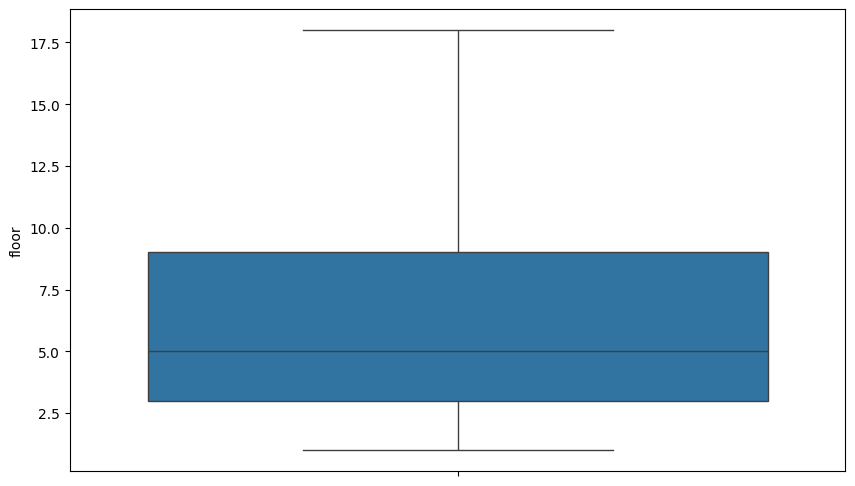

In [202]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floor', data=df)

plt.show()

In [197]:
Q1 = df['floor'].quantile(0.25)
Q3 = df['floor'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

df = df[(df['floor'] >= lower_bound) & (df['floor'] <= upper_bound)]

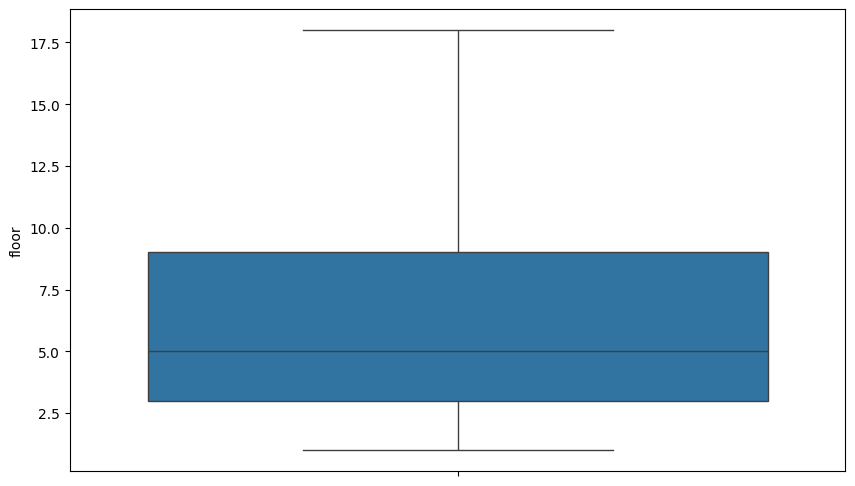

In [201]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floor', data=df)

plt.show()

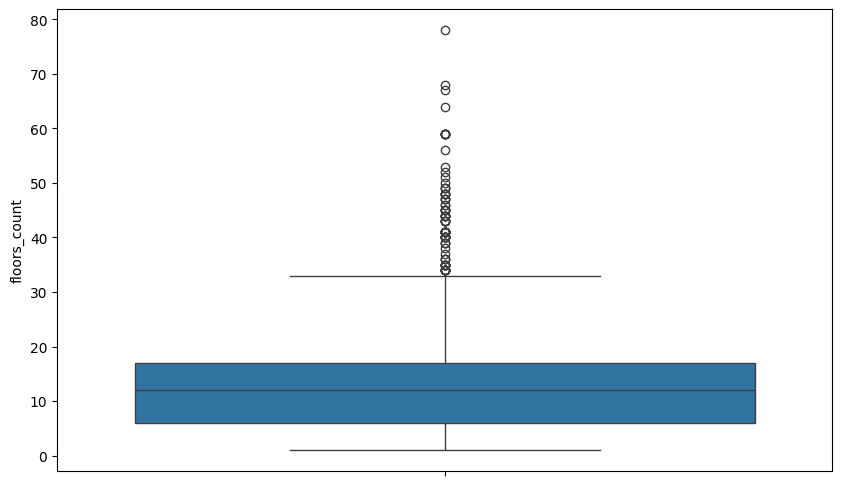

In [200]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floors_count', data=df)

plt.show()

In [206]:
Q1 = df['floors_count'].quantile(0.25)
Q3 = df['floors_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

df = df[(df['floors_count'] >= lower_bound) & (df['floors_count'] <= upper_bound)]

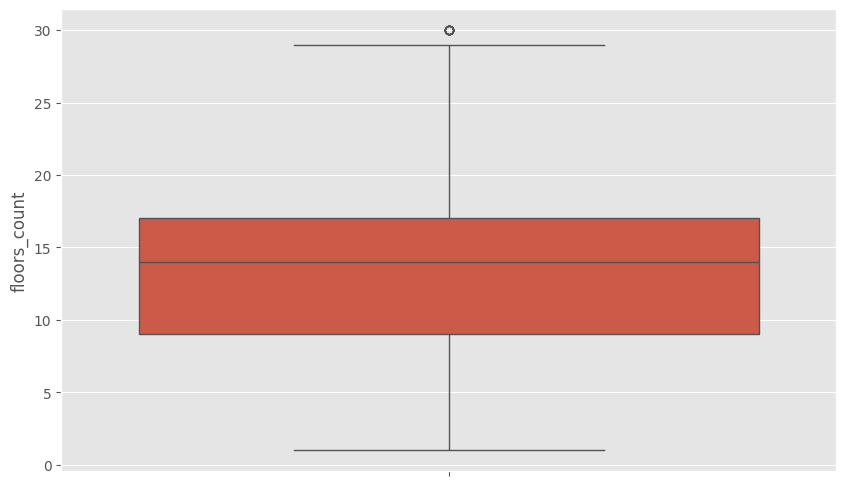

In [240]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='floors_count', data=df)

plt.show()

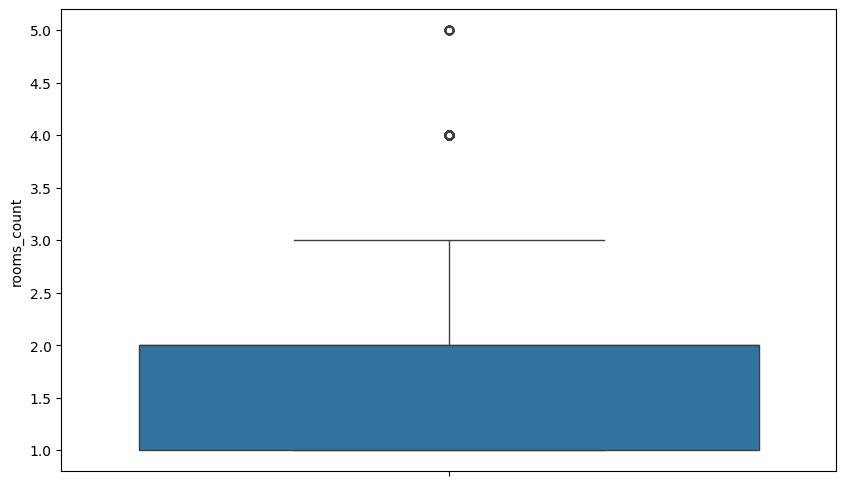

In [208]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='rooms_count', data=df)

plt.show()


In [210]:
Q1 = df['rooms_count'].quantile(0.25)
Q3 = df['rooms_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

df = df[(df['rooms_count'] >= lower_bound) & (df['rooms_count'] <= upper_bound)]

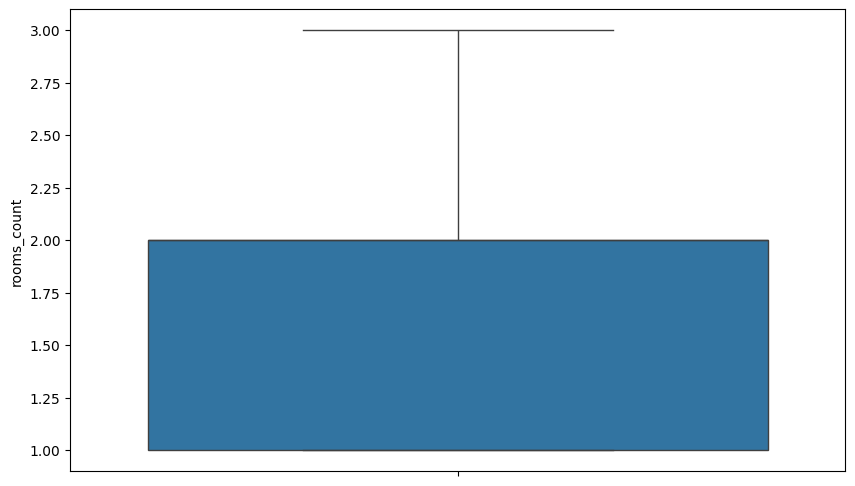

In [211]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='rooms_count', data=df)

plt.show()

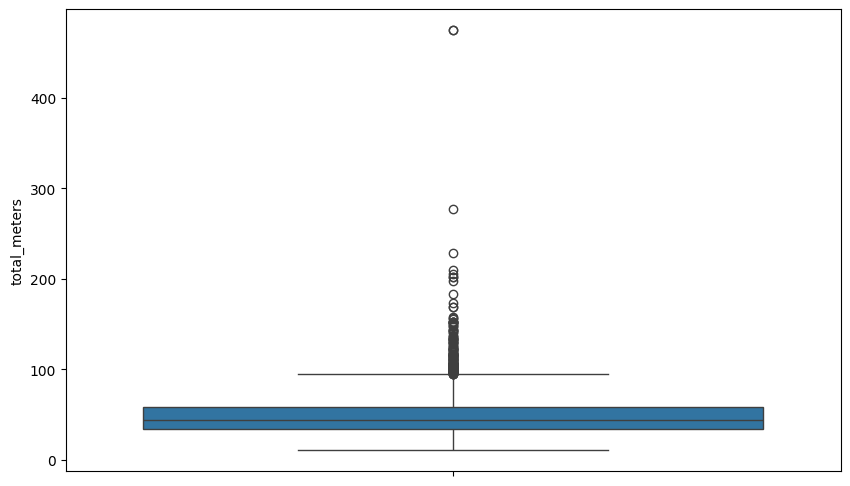

In [213]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_meters', data=df)

plt.show()

In [217]:
Q1 = df['total_meters'].quantile(0.25)
Q3 = df['total_meters'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

df = df[(df['total_meters'] >= lower_bound) & (df['total_meters'] <= upper_bound)]


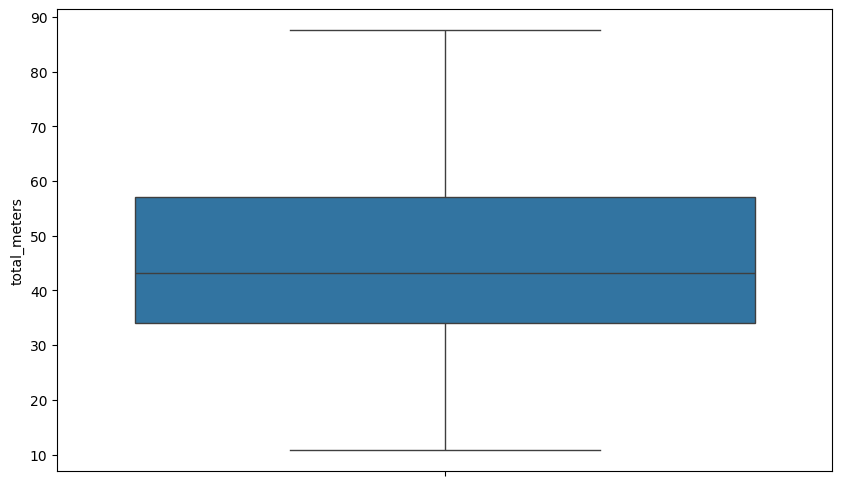

In [218]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_meters', data=df)

plt.show()


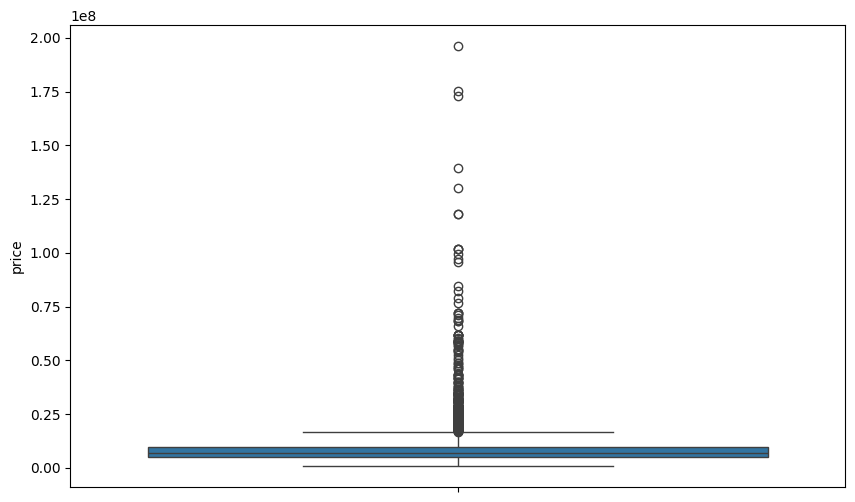

In [221]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=df)

plt.show()

In [222]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.7 * IQR
upper_bound = Q3 + 0.7 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


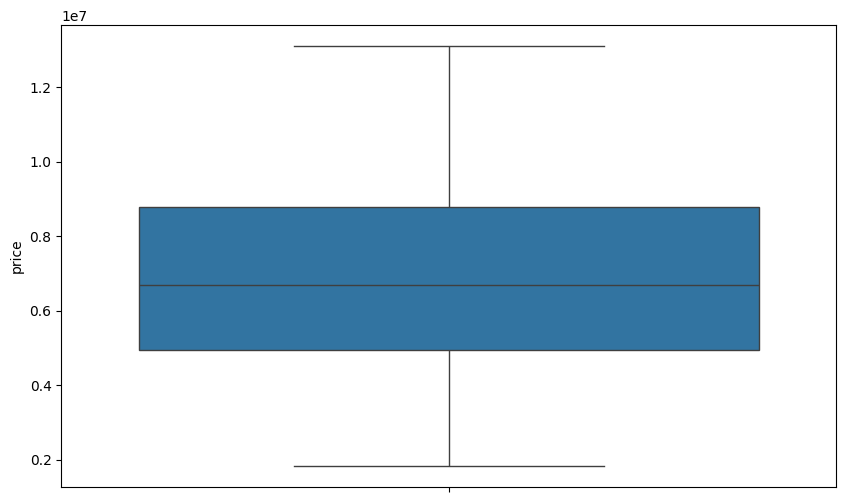

In [223]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=df)

plt.show()

Проанализируем кол-во квартир по кол-ву комнат

In [228]:
df.to_csv('updated5_file.csv', index=False)

In [229]:

df = pd.read_csv('updated5_file.csv')

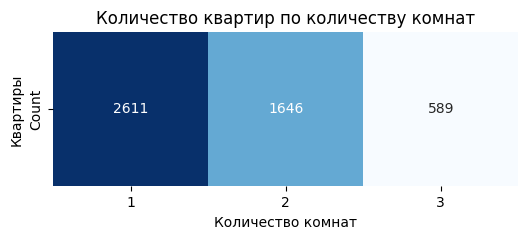

In [230]:

room_counts = df['rooms_count'].value_counts().sort_index()
room_counts_df = room_counts.reset_index()
room_counts_df.columns = ['Rooms', 'Count']

plt.figure(figsize=(6, 2))
sns.heatmap(room_counts_df.set_index('Rooms').T, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title("Количество квартир по количеству комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Квартиры")

plt.show()


Рассмотрим распределение цен на недвижимость и зависимость цены от общей площади

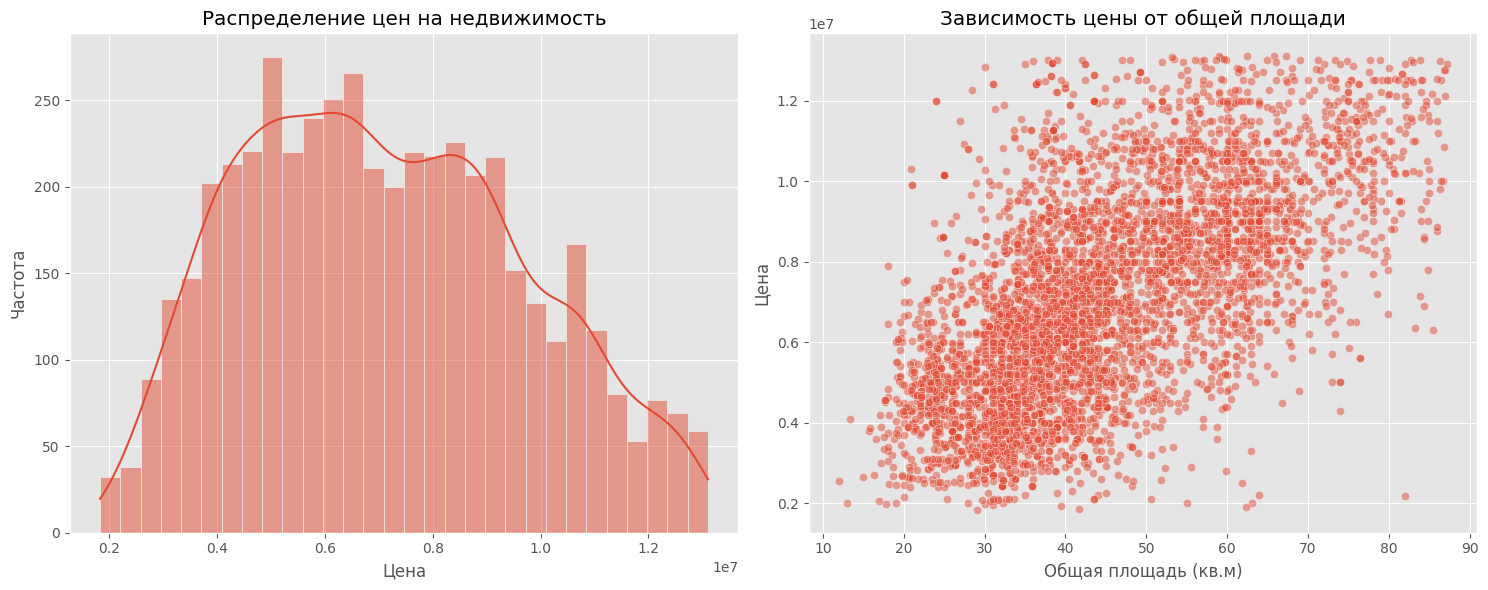

In [234]:

plt.style.use("ggplot")  

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='total_meters', y='price', alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь (кв.м)')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()


Рассмотрим  цену по этажности и их связь

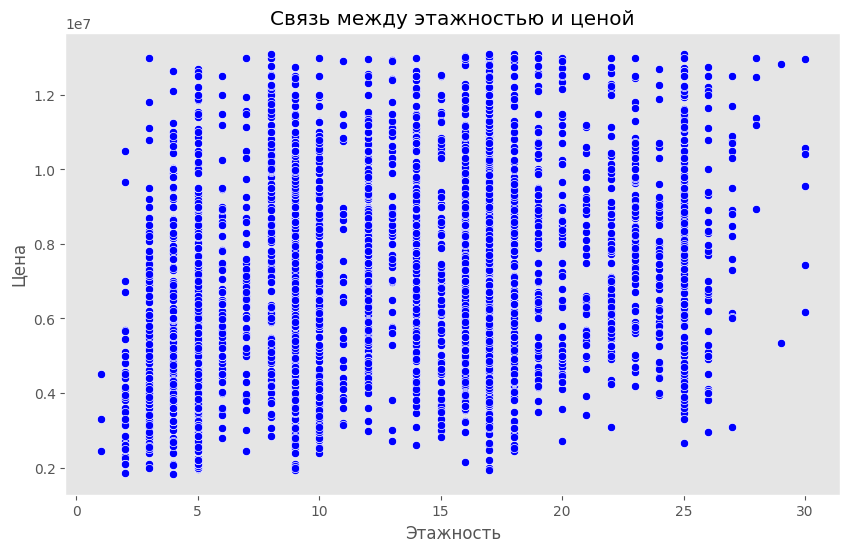

/tmp/ipykernel_25399/1273227963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='floors_count', y='price', data=df, palette='Set2')


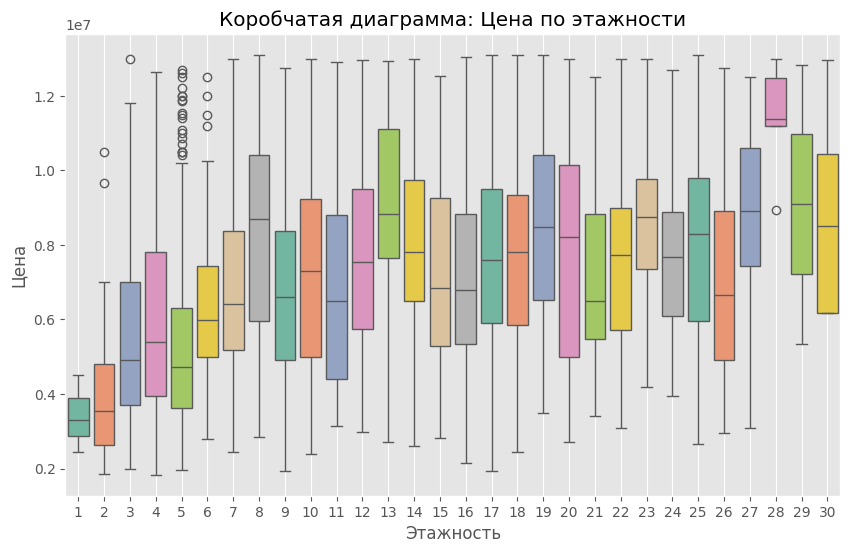

In [239]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='floors_count', y='price', data=df, color='blue')
plt.title('Связь между этажностью и ценой')
plt.xlabel('Этажность')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='floors_count', y='price', data=df, palette='Set2')
plt.title('Коробчатая диаграмма: Цена по этажности')
plt.xlabel('Этажность')
plt.ylabel('Цена')
plt.grid()
plt.show()

/tmp/ipykernel_1168/137619679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parking_type', y='price', data=df, palette='Set2')


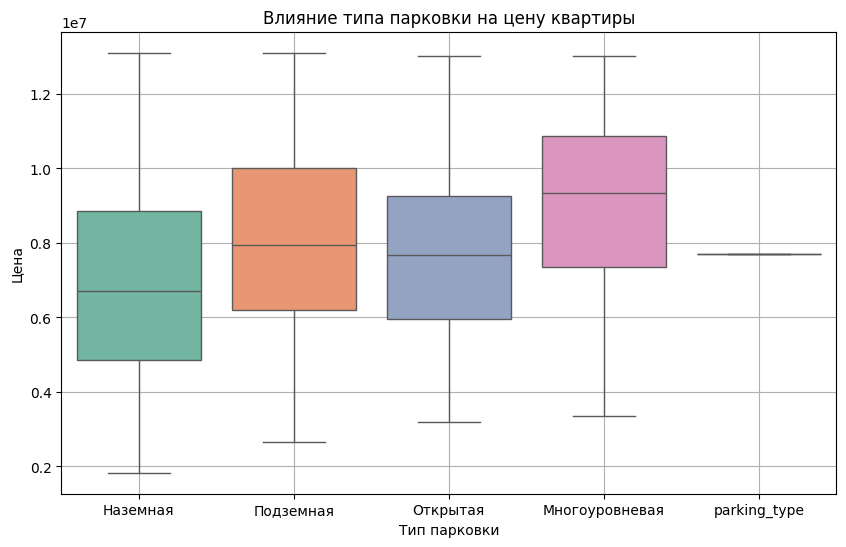

/tmp/ipykernel_1168/137619679.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='floor', y='price', data=df, palette='Set3', s=100)


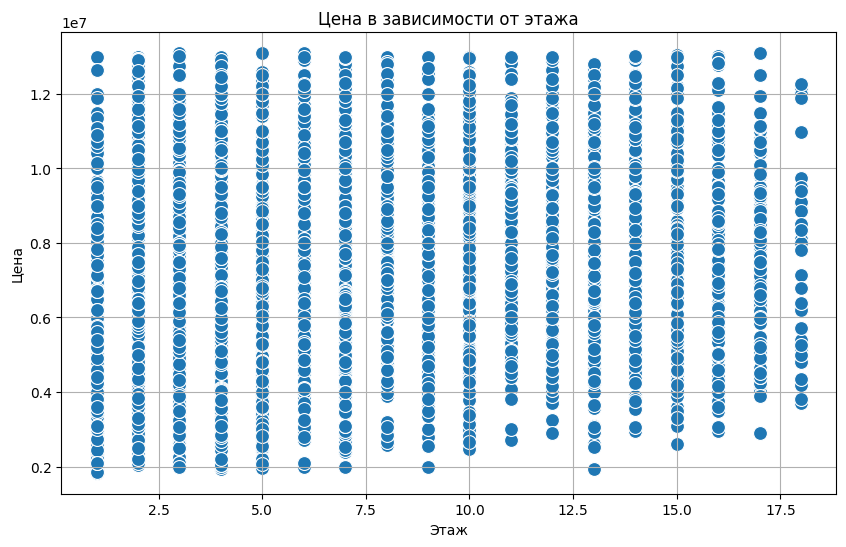

/tmp/ipykernel_1168/137619679.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='total_meters', y='price', data=df, palette='Set4', s=100)


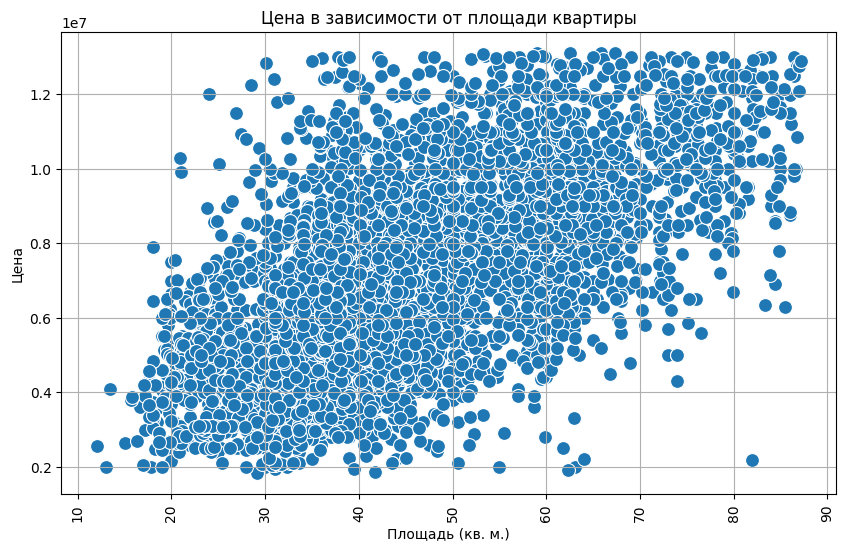

In [8]:
df = pd.read_csv('updated5_file.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='parking_type', y='price', data=df, palette='Set2')
plt.title('Влияние типа парковки на цену квартиры')
plt.xlabel('Тип парковки')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='floor', y='price', data=df, palette='Set3', s=100)
plt.title('Цена в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_meters', y='price', data=df, palette='Set4', s=100)
plt.title('Цена в зависимости от площади квартиры')
plt.xlabel('Площадь (кв. м.)')
plt.ylabel('Цена')
plt.xticks(rotation=90)
plt.grid()
plt.show()

/tmp/ipykernel_25399/2287305524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rooms_count', y='price', data=df, palette='Set2')


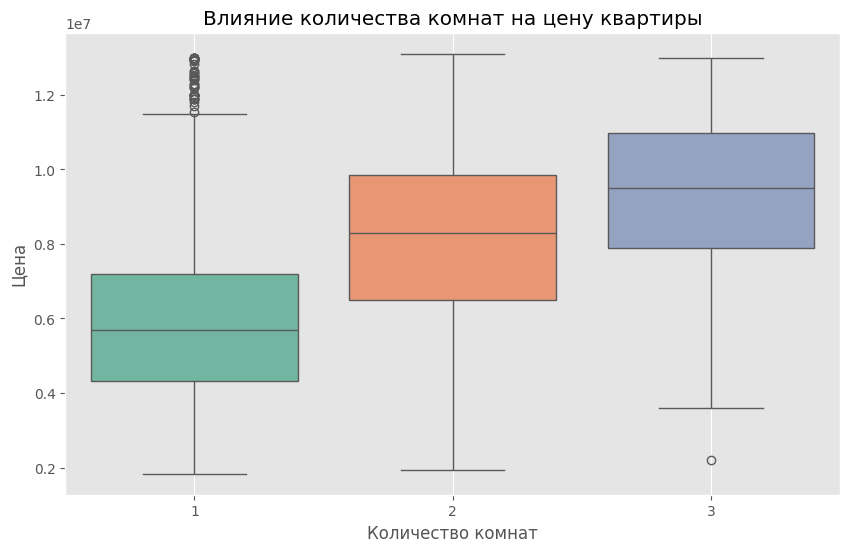

/tmp/ipykernel_25399/2287305524.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='year_of_construction', y='price', data=df, palette='Set1', s=100)


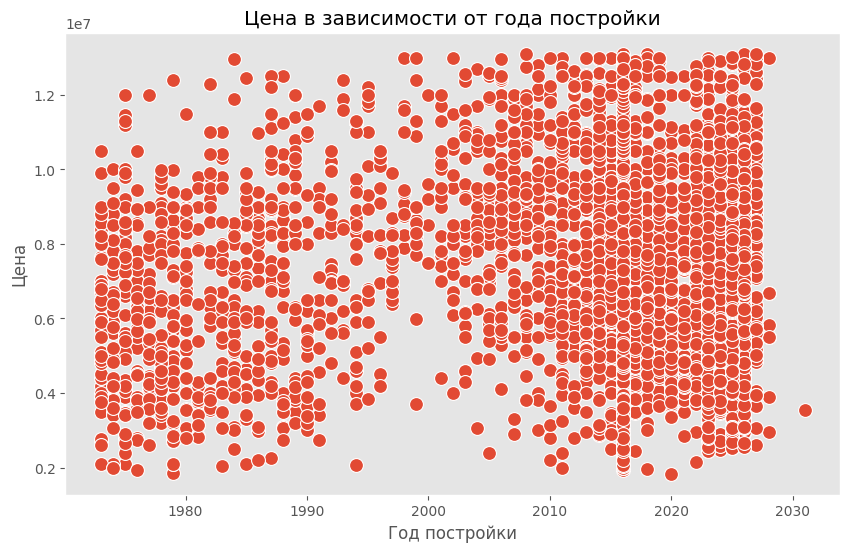

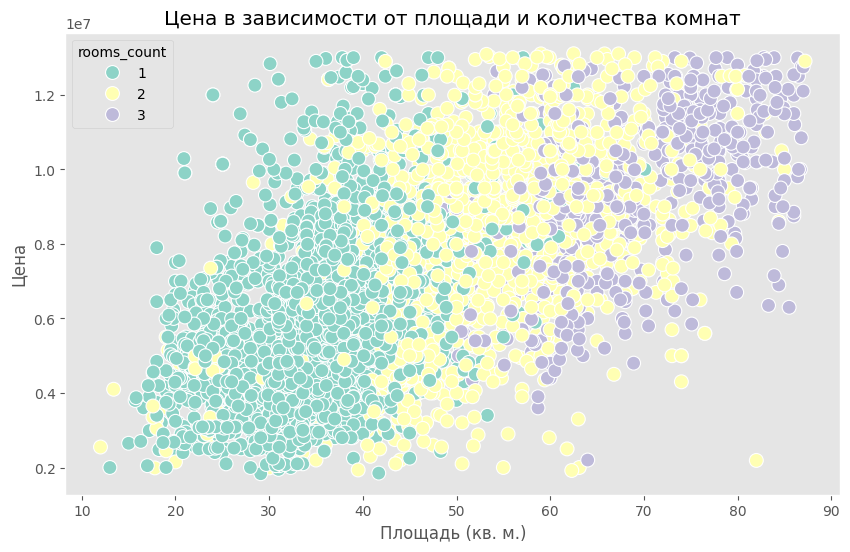

In [250]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rooms_count', y='price', data=df, palette='Set2')
plt.title('Влияние количества комнат на цену квартиры')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year_of_construction', y='price', data=df, palette='Set1', s=100)
plt.title('Цена в зависимости от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Цена')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='living_meters', y='price', hue='rooms_count', data=df, palette='Set3', s=100)
plt.title('Цена в зависимости от площади и количества комнат')
plt.xlabel('Площадь (кв. м.)')
plt.ylabel('Цена')
plt.grid()
plt.show()

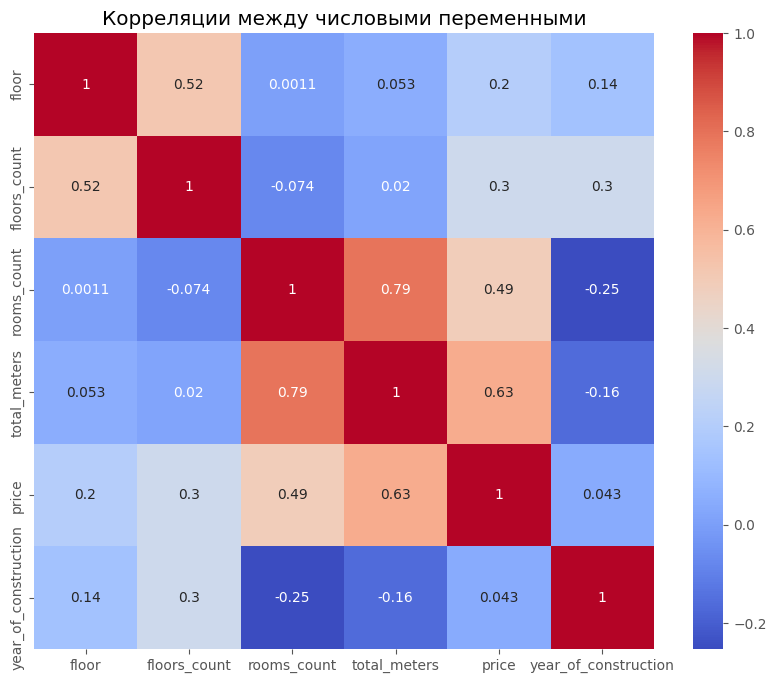

In [254]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции между числовыми переменными')
plt.show()